# Credits

## Importar

In [1]:
# %load basic
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)
pd.options.display.float_format = '{:.2f}'.format
liga = '/home/ef/Documents/Diplomado/EXAMEN0302/'
os.listdir(liga)

['drive-download-20210206T220937Z-001.zip',
 'datos_credits',
 'Examen 2.pdf',
 'images']

In [2]:
import shutil

shutil.unpack_archive(liga + os.listdir(liga)[0], liga + 'datos_credits', 'zip')

In [3]:
liga += 'datos_credits/'
os.listdir(liga)

['account.asc',
 'loan.asc',
 'client.asc',
 'card.asc',
 'disp.asc',
 'order.asc',
 'trans.asc',
 'district.asc']

In [4]:
account = pd.read_csv(liga + 'account.asc', sep = ";")
loan = pd.read_csv(liga + 'loan.asc', sep = ";")
client = pd.read_csv(liga + 'client.asc', sep = ";")
card = pd.read_csv(liga + 'card.asc', sep = ";")
disp = pd.read_csv(liga + 'disp.asc', sep = ";")
order = pd.read_csv(liga + 'order.asc', sep = ";")
trans = pd.read_csv(liga + 'trans.asc', sep = ";")
district = pd.read_csv(liga + 'district.asc', sep = ";")

/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Funciones

In [5]:
import time
import math

start = time.time()

def time_exp(x):
    print(str(int(math.floor(x/60))
             ) + " minutos con " + '{:.2f}'.format(60*(x/60 - math.floor(x/60))
                                                  ) + " segundos")

In [6]:
#Tono para cuando termina el script
from IPython.lib.display import Audio
import numpy as np

def tono(a = 1000, b = 700, play_time_seconds = 2, framerate = 4410,):
    t = np.linspace(0, play_time_seconds, framerate*play_time_seconds)*np.pi
    return Audio(np.sin(a*t) + np.sin(b*t), rate = framerate, autoplay=True)

## Instrucciones

Diagrama:


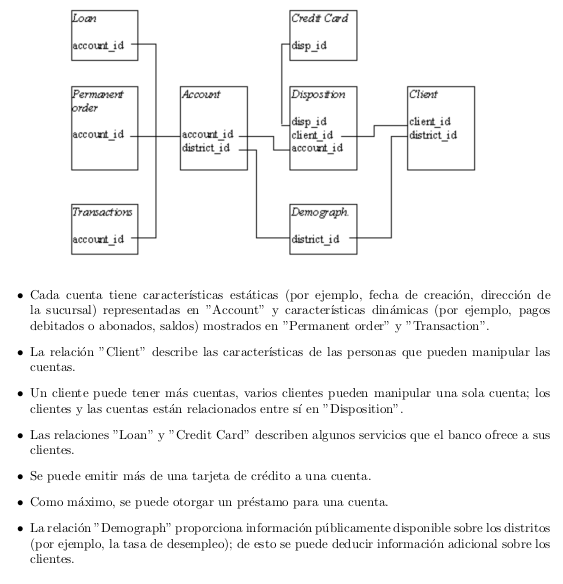

Dicc_01:


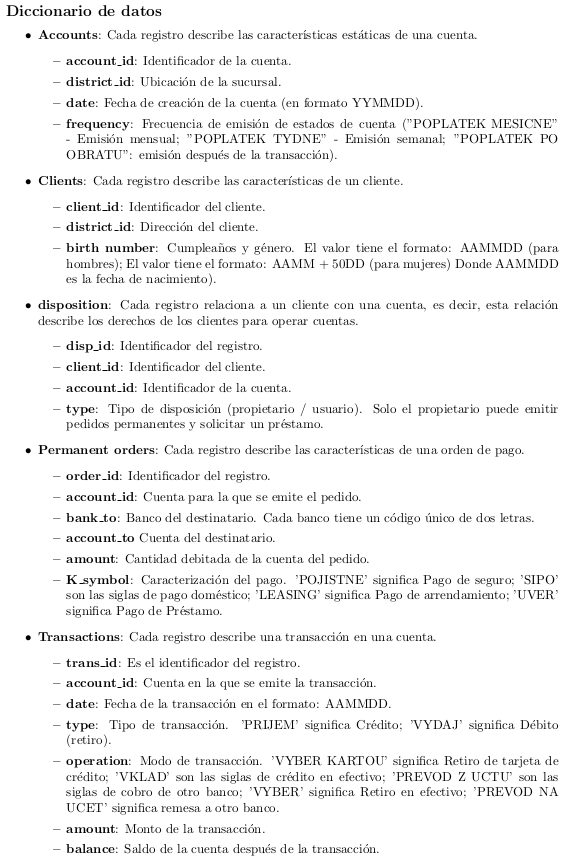

Dicc_02:


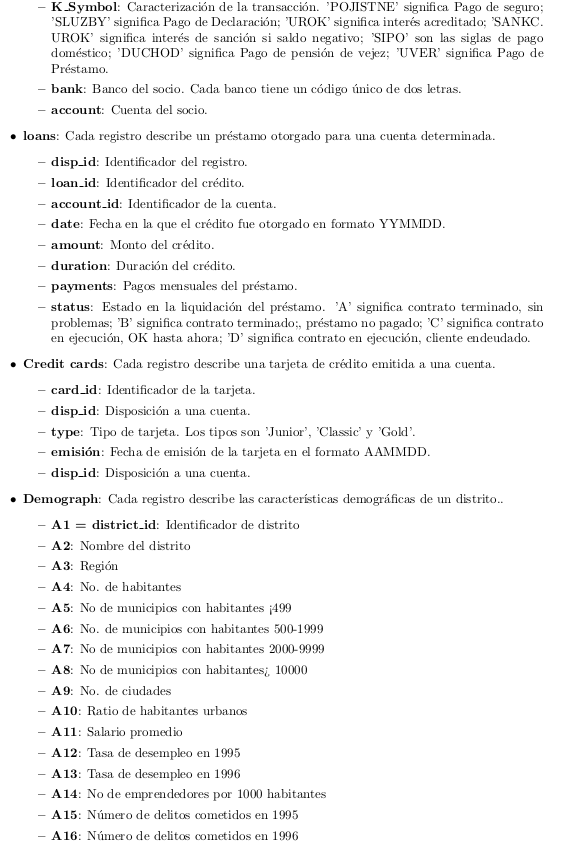

Entregables:


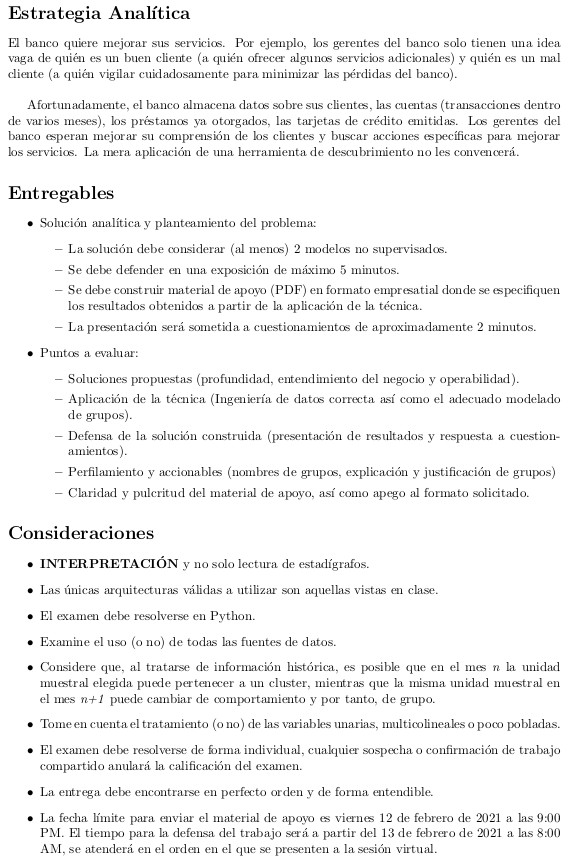

In [7]:
from PIL import Image

image_dir = liga[:-14] + 'images/'
images = os.listdir(image_dir)

for image in sorted(images):
    print(f'{image[:-4][6:].capitalize()}:')
    display(Image.open(image_dir + image))

## EDA

In [8]:
tablas = [account,client,disp,order,trans,loan,card,district]
for tabla in tablas:
    print(tabla.shape)
    display(tabla.sample())
    display(tabla.isnull().sum().reset_index().sort_values(by=0, ascending = False).head())

(4500, 4)


,account_id,district_id,frequency,date
3209,3569,1,POPLATEK MESICNE,960918


,index,0
0,account_id,0
1,district_id,0
2,frequency,0
3,date,0


(5369, 3)


,client_id,birth_number,district_id
3765,3977,750927,8


,index,0
0,client_id,0
1,birth_number,0
2,district_id,0


(5369, 4)


,disp_id,client_id,account_id,type
2762,2919,2919,2416,DISPONENT


,index,0
0,disp_id,0
1,client_id,0
2,account_id,0
3,type,0


(6471, 6)


,order_id,account_id,bank_to,account_to,amount,k_symbol
4990,34935,3754,OP,52597421,1184.00,


,index,0
0,order_id,0
1,account_id,0
2,bank_to,0
3,account_to,0
4,amount,0


(1056320, 10)


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
813281,592249,2015,980314,PRIJEM,VKLAD,3900.00,31346.70,NaN,NaN,nan


,index,0
8,bank,782812
9,account,760931
7,k_symbol,481881
4,operation,183114
0,trans_id,0


(682, 7)


,loan_id,account_id,date,amount,duration,payments,status
257,6667,8127,960715,155880,24,6495.00,A


,index,0
0,loan_id,0
1,account_id,0
2,date,0
3,amount,0
4,duration,0


(892, 4)


,card_id,disp_id,type,issued
345,495,3181,classic,970902 00:00:00


,index,0
0,card_id,0
1,disp_id,0
2,type,0
3,issued,0


(77, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
59,60,Prostejov,south Moravia,110643,49,41,4,1,4,51.90,8441,3.45,4.48,115,1879,2252


,index,0
0,A1,0
1,A2,0
2,A3,0
3,A4,0
4,A5,0


### Account

In [9]:
#Cada registro describe las características estáticas de una cuenta
account.sample()

,account_id,district_id,frequency,date
1105,3094,56,POPLATEK MESICNE,931220


<AxesSubplot:>

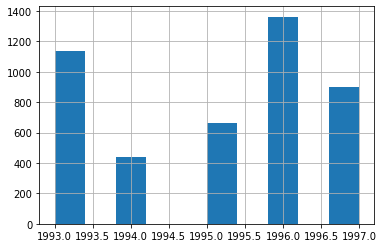

In [10]:
account['date'] = pd.to_datetime(account['date'], format = '%y%m%d')
account['date'].dt.year.hist()

In [11]:
dict_account_frequency = {'POPLATEK MESICNE':'mensual',
                          'POPLATEK TYDNE':'semanal',
                          'POPLATEK PO OBRATU':'pos-transacc'}

#Columna poco poblada, se considerará omitir
account['frequency'] = account[['frequency']].replace(dict_account_frequency)
account['frequency'].value_counts(1, dropna = False)

mensual        0.93
semanal        0.05
pos-transacc   0.02
Name: frequency, dtype: float64

### Clients

In [12]:
#Cada registro describe las características de un cliente
client.sample()

,client_id,birth_number,district_id
3139,3314,316218,24


In [13]:
client['genero'] = list(map(lambda x: 'M' if int(str(x)[2:4])-50>0 else 'H',
                            client['birth_number']))
client['genero'].value_counts(1, dropna = False)

H   0.51
M   0.49
Name: genero, dtype: float64

<AxesSubplot:>

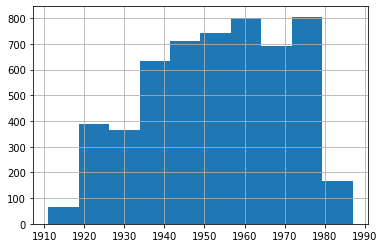

In [14]:
client['birth_number'] = [pd.to_datetime(19000000 + x, format = '%Y%m%d') if y == 'H' else 
                          pd.to_datetime(19000000 + x - 5000, format = '%Y%m%d') for x,y in 
                          zip(client['birth_number'],client['genero'])]

client['birth_number'].dt.year.hist()

### Disposition

In [15]:
#Cada registro relaciona a un cliente con una cuenta, es decir, esta relación
##describe los derechos de los clientes para operar las cuentas
disp.sample()

,disp_id,client_id,account_id,type
1666,1768,1768,1458,OWNER


In [16]:
#Sólo el propietario puede emitir pedidos permanentes y solicitar un préstamo
disp['type'].value_counts(1, dropna = False)

OWNER       0.84
DISPONENT   0.16
Name: type, dtype: float64

### Orders

In [17]:
#Cada registro describe las características de una orden de pago
order.sample()

,order_id,account_id,bank_to,account_to,amount,k_symbol
5366,35480,4131,UV,18379521,4696.00,


In [18]:
#Cada banco tiene un código único de dos letras
order['bank_to'].value_counts(1, dropna = False)

QR   0.08
YZ   0.08
AB   0.08
WX   0.08
ST   0.08
KL   0.08
UV   0.08
IJ   0.08
GH   0.08
OP   0.07
EF   0.07
MN   0.07
CD   0.07
Name: bank_to, dtype: float64

In [19]:
dict_order_k_symbol = {'POJISTNE':'seguro','SIPO':'domestico',
                       'LEASING':'arrendamiento','UVER':'prestamo',
                       ' ':np.nan}

order['k_symbol'] = order[['k_symbol']].replace(dict_order_k_symbol)
order['k_symbol'].value_counts(1, dropna = False)

domestico       0.54
NaN             0.21
prestamo        0.11
seguro          0.08
arrendamiento   0.05
Name: k_symbol, dtype: float64

### Transaction

In [20]:
#Cada registro describe una transacción en una cuenta
trans.sample()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
193303,292506,1000,950731,VYDAJ,VYBER,14.60,34242.30,SLUZBY,NaN,nan


<AxesSubplot:>

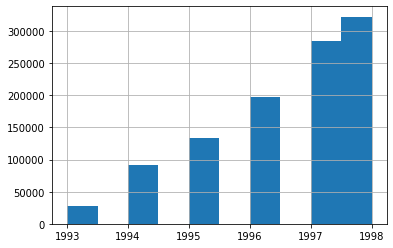

In [21]:
trans['date'] = pd.to_datetime(trans['date'], format = '%y%m%d')
trans['date'].dt.year.hist()

In [22]:
dict_trans_type = {'PRIJEM':'credito','VYDAJ':'debito','VYBER':'efectivo',' ':np.nan}

trans['type'] = trans[['type']].replace(dict_trans_type)
trans['type'].value_counts(1, dropna = False)

debito     0.60
credito    0.38
efectivo   0.02
Name: type, dtype: float64

In [23]:
dict_trans_operation = {'VYBER KARTOU':'retiro_tarjeta_credito',
                        'VKLAD':'credito_efectivo',
                        'PREVOD Z UCTU':'cobro_otro_banco',
                        'VYBER':'retiro_efectivo',
                        'PREVOD NA UCET':'remesa_otro_banco',' ':np.nan}

trans['operation'] = trans[['operation']].replace(dict_trans_operation)
trans['operation'].value_counts(1, dropna = False)

retiro_efectivo          0.41
remesa_otro_banco        0.20
NaN                      0.17
credito_efectivo         0.15
cobro_otro_banco         0.06
retiro_tarjeta_credito   0.01
Name: operation, dtype: float64

In [24]:
dict_trans_k_symbol = {'POJISTNE':'seguro', 
                       'SLUZBY':'declaracion',
                       'UROK':'interes_acreditado',
                       'SANKC. UROK':'interes_sancion_saldo_neg',
                       'SIPO':'domestico',
                       'DUCHOD':'pension_vejez',
                       'UVER':'prestamo',
                       ' ':np.nan}

trans['k_symbol'] = trans[['k_symbol']].replace(dict_trans_k_symbol)
trans['k_symbol'].value_counts(1, dropna = False)

NaN                         0.51
interes_acreditado          0.17
declaracion                 0.15
domestico                   0.11
pension_vejez               0.03
seguro                      0.02
prestamo                    0.01
interes_sancion_saldo_neg   0.00
Name: k_symbol, dtype: float64

### Loans

In [25]:
#Cada registro describr un préstamo otorgado para una cuenta determinada
loan.sample()

,loan_id,account_id,date,amount,duration,payments,status
238,5452,2352,960429,49440,60,824.00,C


<AxesSubplot:>

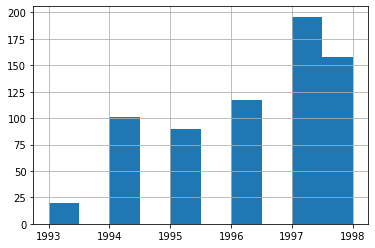

In [26]:
loan['date'] = pd.to_datetime(loan['date'], format = '%y%m%d')
loan['date'].dt.year.hist()

In [27]:
dict_loan_status = {'A':'terminado_ok', 'B':'terminado_deuda',
                    'C':'ejecucion_ok', 'D':'ejecucion_deuda', ' ':np.nan}

loan['status'] = loan[['status']].replace(dict_loan_status)
loan['status'].value_counts(1, dropna = False)

ejecucion_ok      0.59
terminado_ok      0.30
ejecucion_deuda   0.07
terminado_deuda   0.05
Name: status, dtype: float64

### Credit cards

In [28]:
#Cada registro describe una tarjeta de crédito emitida a una cuenta
card.sample()

,card_id,disp_id,type,issued
144,1043,9974,junior,960814 00:00:00


<AxesSubplot:>

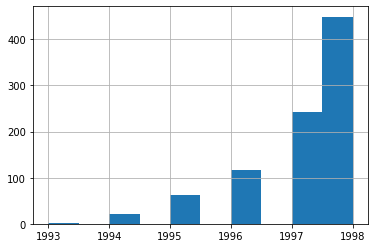

In [29]:
card['issued'] = pd.to_datetime(card['issued'].str[:-9], format = '%y%m%d')
card['issued'].dt.year.hist()

### Demograph

In [30]:
#Cada_registro_describe_las_características_demográficas_un_distrito
dict_district_colnames = {'A1':'Id',
                          'A2':'Nombre',
                          'A3':'Región',
                          'A4':'No_hab',
                          'A5':'No_municipios_hab_000_499',
                          'A6':'No_municipios_hab_500_1999',
                          'A7':'No_municipios_hab_2000_9999',
                          'A8':'No_municipios_hab_10000',
                          'A9':'No_ciudades',
                          'A10':'Ratio_hab_urbanos',
                          'A11':'Salario_promedio',
                          'A12':'Tasa_desempleo_1995',
                          'A13':'Tasa_desempleo_1996',
                          'A14':'No_emprendedores_por_1000_hab',
                          'A15':'Número_delitos_cometidos_1995',
                          'A16':'Número_delitos_cometidos_1996'}

district.columns = [dict_district_colnames[x] for x in district.columns]
district.sample()

,Id,Nombre,Región,No_hab,No_municipios_hab_000_499,No_municipios_hab_500_1999,No_municipios_hab_2000_9999,No_municipios_hab_10000,No_ciudades,Ratio_hab_urbanos,Salario_promedio,Tasa_desempleo_1995,Tasa_desempleo_1996,No_emprendedores_por_1000_hab,Número_delitos_cometidos_1995,Número_delitos_cometidos_1996
38,39,Most,north Bohemia,119895,17,4,3,2,4,89.90,10446,7.34,9.40,90,4947,4743


In [31]:
#Existe un valor ausente (en realidad no existe :v)
aux = district.replace({'?':np.nan})
display(aux.isnull().sum())
aux[aux['Número_delitos_cometidos_1995'].isnull()]

Id                               0
Nombre                           0
Región                           0
No_hab                           0
No_municipios_hab_000_499        0
No_municipios_hab_500_1999       0
No_municipios_hab_2000_9999      0
No_municipios_hab_10000          0
No_ciudades                      0
Ratio_hab_urbanos                0
Salario_promedio                 0
Tasa_desempleo_1995              1
Tasa_desempleo_1996              0
No_emprendedores_por_1000_hab    0
Número_delitos_cometidos_1995    1
Número_delitos_cometidos_1996    0
dtype: int64

,Id,Nombre,Región,No_hab,No_municipios_hab_000_499,No_municipios_hab_500_1999,No_municipios_hab_2000_9999,No_municipios_hab_10000,No_ciudades,Ratio_hab_urbanos,Salario_promedio,Tasa_desempleo_1995,Tasa_desempleo_1996,No_emprendedores_por_1000_hab,Número_delitos_cometidos_1995,Número_delitos_cometidos_1996
68,69,Jesenik,north Moravia,42821,4,13,5,1,3,48.40,8173,NaN,7.01,124,NaN,1358


In [32]:
#Se intentará calcular con base en sus vecinos
district.set_index(['Id','Nombre','Región'], inplace = True)
omitir = ['Tasa_desempleo_1995','Número_delitos_cometidos_1995']
aux = district[[x for x in district.columns if x not in omitir]].copy()

In [33]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 5, algorithm = 'ball_tree')
nbrs.fit(aux)
distances, indices = nbrs.kneighbors(aux)

resultado = district.reset_index().iloc[:,:2].astype(str)

indices = pd.DataFrame(indices)
for col in indices.columns:
    indices[col] = [resultado.iloc[x,1] for x in indices[col]]
    
indices.set_index(0, inplace = True)

vecinos = list(indices.loc['Jesenik',:])
vecinos

['Rokycany', 'Tachov', 'Prachatice', 'Rakovnik']

In [34]:
district.reset_index(inplace = True)
aux = pd.DataFrame()
for x in vecinos:
    aux = aux.append(district[district['Nombre']==x][['Tasa_desempleo_1995',
                                                      'Tasa_desempleo_1996',
                                                      'Número_delitos_cometidos_1995',
                                                      'Número_delitos_cometidos_1996']].astype(float), 
                     ignore_index = True)

#Se obtendrá mediante el incremento nominal y porcentual año contra año (YoY) de ambas métricas
aux['desempleo'] = aux['Tasa_desempleo_1996']-aux['Tasa_desempleo_1995']
aux['delitos'] = aux['Número_delitos_cometidos_1996']/aux['Número_delitos_cometidos_1995']-1

aux[['desempleo','delitos']].describe()

,desempleo,delitos
count,4.00,4.00
mean,0.70,0.11
std,0.16,0.04
min,0.49,0.09
25%,0.63,0.09
50%,0.73,0.10
75%,0.80,0.12
max,0.85,0.17


In [35]:
district.set_index('Nombre', inplace = True)
district.loc['Jesenik',
             'Tasa_desempleo_1995'] = district.loc['Jesenik',
                                                   'Tasa_desempleo_1996']-aux['desempleo'].median()
district.loc['Jesenik',
             'Número_delitos_cometidos_1995'] = district.loc['Jesenik',
                                                             'Número_delitos_cometidos_1996']/(1+aux['desempleo'].median())
district.reset_index(inplace = True)
district[district['Nombre'] == 'Jesenik']

,Nombre,Id,Región,No_hab,No_municipios_hab_000_499,No_municipios_hab_500_1999,No_municipios_hab_2000_9999,No_municipios_hab_10000,No_ciudades,Ratio_hab_urbanos,Salario_promedio,Tasa_desempleo_1995,Tasa_desempleo_1996,No_emprendedores_por_1000_hab,Número_delitos_cometidos_1995,Número_delitos_cometidos_1996
68,Jesenik,69,north Moravia,42821,4,13,5,1,3,48.40,8173,6.28,7.01,124,784.97,1358


## Ingeniería de variables

In [36]:
tablas = [account,client,disp,order,trans,loan,card,district]
for tabla in tablas:
    print(tabla.shape)
    display(tabla.sample())
    display(tabla.isnull().sum().reset_index().sort_values(by=0, ascending = False).head())

(4500, 4)


,account_id,district_id,frequency,date
14,485,6,pos-transacc,1993-01-04


,index,0
0,account_id,0
1,district_id,0
2,frequency,0
3,date,0


(5369, 4)


,client_id,birth_number,district_id,genero
1561,1653,1944-06-19,42,H


,index,0
0,client_id,0
1,birth_number,0
2,district_id,0
3,genero,0


(5369, 4)


,disp_id,client_id,account_id,type
2374,2503,2503,2064,OWNER


,index,0
0,disp_id,0
1,client_id,0
2,account_id,0
3,type,0


(6471, 6)


,order_id,account_id,bank_to,account_to,amount,k_symbol
3539,33306,2647,YZ,4161513,5303.00,domestico


,index,0
5,k_symbol,1379
0,order_id,0
1,account_id,0
2,bank_to,0
3,account_to,0


(1056320, 10)


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
122766,2258867,7454,1995-01-07,debito,remesa_otro_banco,2306.00,12706.30,domestico,QR,96140414.00


,index,0
8,bank,782812
9,account,760931
7,k_symbol,535314
4,operation,183114
0,trans_id,0


(682, 7)


,loan_id,account_id,date,amount,duration,payments,status
647,6969,9673,1998-09-12,88200,36,2450.00,ejecucion_ok


,index,0
0,loan_id,0
1,account_id,0
2,date,0
3,amount,0
4,duration,0


(892, 4)


,card_id,disp_id,type,issued
233,324,2074,classic,1997-02-19


,index,0
0,card_id,0
1,disp_id,0
2,type,0
3,issued,0


(77, 16)


,Nombre,Id,Región,No_hab,No_municipios_hab_000_499,No_municipios_hab_500_1999,No_municipios_hab_2000_9999,No_municipios_hab_10000,No_ciudades,Ratio_hab_urbanos,Salario_promedio,Tasa_desempleo_1995,Tasa_desempleo_1996,No_emprendedores_por_1000_hab,Número_delitos_cometidos_1995,Número_delitos_cometidos_1996
53,Brno - mesto,54,south Moravia,387570,0,0,0,1,1,100.00,9897,1.60,1.96,140,18721,18696


,index,0
0,Nombre,0
1,Id,0
2,Región,0
3,No_hab,0
4,No_municipios_hab_000_499,0


### Demograph

In [37]:
#Nos quedamos con puras variables numéricas
district = district.set_index(['Id','Nombre','Región']).astype(float)

#Variación nominal YoY de la tasa de desempleo
district['var_desempleo'] = district['Tasa_desempleo_1996']-district['Tasa_desempleo_1995']

#Variación porcentual YoY del número de delitos
district['var_delitos'] = (district['Número_delitos_cometidos_1996'] /
                           district['Número_delitos_cometidos_1995'] - 1)

#Tasa de delincuencia para cada año (con mismos habitantes (?))
for col in ['Número_delitos_cometidos_1995','Número_delitos_cometidos_1996']:
    district[col] = district[col] / district['No_hab']
    
#Total de municipios
munic = [x for x in district.columns if x.startswith('No_municipios')]
district['tot_munic'] = district[munic].sum(axis = 1)

#Porcentaje de municipios en cada rango poblacional
for col in munic:
    district[col] /= district['tot_munic']

#No son necesarias las columnas del total de habitantes o municipios
district.drop(columns = ['No_hab','tot_munic'], inplace = True)
district.sample()

,,,No_municipios_hab_000_499,No_municipios_hab_500_1999,No_municipios_hab_2000_9999,No_municipios_hab_10000,No_ciudades,Ratio_hab_urbanos,Salario_promedio,Tasa_desempleo_1995,Tasa_desempleo_1996,No_emprendedores_por_1000_hab,Número_delitos_cometidos_1995,Número_delitos_cometidos_1996,var_desempleo,var_delitos
Id,Nombre,Región,,,,,,,,,,,,,,
3,Beroun,central Bohemia,0.64,0.30,0.05,0.01,5.00,41.70,8980.00,1.95,2.21,111.00,0.04,0.04,0.26,-0.00


In [38]:
import string
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

mm_district = MinMaxScaler()

#Aplicar MinMax y PCA al mismo tiempo
Xs = pd.DataFrame(mm_district.fit_transform(district), 
                  index = district.index, 
                  columns = district.columns)

#Clusterizar
n_clusters = 4
cluster = GaussianMixture(n_components = n_clusters, random_state = 22)
district['district_cluster'] = Xs['district_cluster'] = cluster.fit_predict(Xs)

#Diccionario de letras mayúsculas
dict_cluster_district = {0:'Central City (delitos)',
                         1:'Gótica (desempleo)',
                         2:'Metropolis',
                         3:'Smallville'}

#Reemplazar número de clúster por letra
Xs['district_cluster'] = Xs[['district_cluster']].replace(dict_cluster_district)
district['district_cluster'] = Xs['district_cluster'].copy()

#Porcentaje de distritos por clúster
district['district_cluster'].value_counts(1)

Smallville               0.48
Central City (delitos)   0.27
Gótica (desempleo)       0.19
Metropolis               0.05
Name: district_cluster, dtype: float64

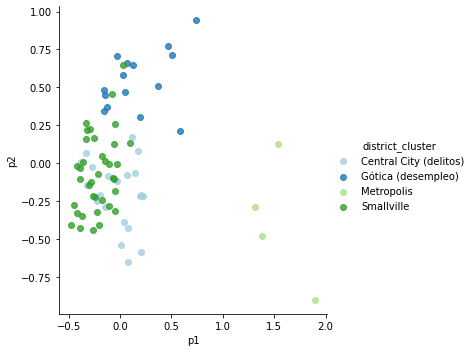

In [39]:
#PCA de 2 componentes para graficar
pca_aux = PCA(2)
pipe_aux = Pipeline(steps=[('MinMax', mm_district),
                           ('PCA', pca_aux)])

#Aplicar MinMax y PCA al mismo tiempo
Xg = pd.DataFrame(pipe_aux.fit_transform(district.iloc[:,:-1]), 
                  index = district.index, 
                  columns = ['p1','p2'])

Xg['district_cluster'] = Xs['district_cluster'].copy()

#Scatterplot de las dos dimensiones de PCA separando por color cada clúster
sns.lmplot(data = Xg.sort_values(by = 'district_cluster'),
           x = 'p1',
           y = 'p2',
           fit_reg = False, 
           hue = 'district_cluster', 
           palette = 'Paired')

<AxesSubplot:xlabel='district_cluster'>

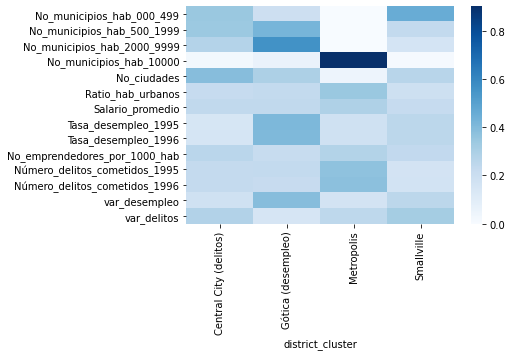

In [40]:
import seaborn as sns
#Perfilamiento
aux = district.groupby('district_cluster').mean()
#Porcentaje respecto a la suma por columna
for col in aux.columns:
    aux[col] = aux[col]/aux[col].sum()

fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

#Heatmap
sns.heatmap(aux.transpose(), cmap = 'Blues')

### Clients

In [41]:
client.sample()

,client_id,birth_number,district_id,genero
3357,3542,1939-09-02,10,H


In [42]:
#Unir con clúster de distrito
client = client.merge(district.reset_index()[['Id','district_cluster']], 
                      left_on = 'district_id',
                      right_on = 'Id',
                      how = 'left')
#Edad del cliente
client['client_age'] = 2000 - client['birth_number'].dt.year

#Omitir columnas innecesarias
client = client.drop(columns = ['birth_number','district_id','Id']).set_index('client_id')
client.sample()

,genero,district_cluster,client_age
client_id,,,
12844,H,Smallville,54


### Account

In [43]:
account.sample()

,account_id,district_id,frequency,date
558,2687,76,mensual,1993-07-01


In [44]:
#Edad de la cuenta
account['account_age'] = (2000 - account['date'].dt.year).astype(str)
#Mes de apertura
account['account_month'] = account['date'].dt.month.astype(str)

#Omitir columnas innecesarias
account = account.drop(columns = ['date']).set_index('account_id').rename(columns = {'frequency':'account_frequency'})
account.sample()

,district_id,account_frequency,account_age,account_month
account_id,,,,
3464,25,mensual,5,5


### Transaction

In [45]:
trans.sample()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
519014,383503,1302,1997-03-31,debito,retiro_efectivo,14.60,18595.60,declaracion,NaN,nan


In [46]:
#Los valores ausentes aportan info
trans.fillna('No_especifica', inplace = True)

#Proporción de pago entre saldo total
trans['prop_pago'] = trans['amount'] / (trans['balance'] + 1)

#Edad del préstamo
trans['trans_age'] = (2000 - trans['date'].dt.year).astype(str)
#Mes de emisión
trans['trans_month'] = trans['date'].dt.month.astype(str)
#Trimestre de emisión
aux = []
for x in trans['trans_month']:
    if x in ['1','2','3']:
        aux.append('1Q')
    elif x in ['4','5','6']:
        aux.append('2Q')
    elif x in ['7','8','9']:
        aux.append('3Q')
    elif x in ['10','11','12']:
        aux.append('4Q')
    else:
        aux.append(np.nan)
        
trans['trans_quarter'] = aux
        
trans = trans.drop(columns = ['date']).set_index('trans_id').rename(columns = {'type':'trans_type'})
trans.sample()

,account_id,trans_type,operation,amount,balance,k_symbol,bank,account,prop_pago,trans_age,trans_month,trans_quarter
trans_id,,,,,,,,,,,,
908814,3096,debito,remesa_otro_banco,6446.00,32921.30,domestico,CD,81572884.00,0.20,3,9,3Q


### Loan

In [47]:
loan.sample()

,loan_id,account_id,date,amount,duration,payments,status
484,6607,7894,1997-10-21,153144,36,4254.00,ejecucion_ok


In [48]:
#Edad del préstamo
loan['loan_age'] = (2000 - loan['date'].dt.year).astype(str)
#Mes de emisión
loan['loan_month'] = loan['date'].dt.month.astype(str)

loan = loan.drop(columns = ['date']).set_index('loan_id')
loan.sample()

,account_id,amount,duration,payments,status,loan_age,loan_month
loan_id,,,,,,,
5977,4803,59136,48,1232.00,ejecucion_ok,3,2


### Order

In [49]:
order.set_index('order_id', inplace = True)
order.sample()

,account_id,bank_to,account_to,amount,k_symbol
order_id,,,,,
33928,3055,KL,99765395,1279.00,domestico


### Disposition

In [50]:
disp.set_index('disp_id', inplace = True)
disp.sample()

,client_id,account_id,type
disp_id,,,
1126,1126,934,DISPONENT


### Credit Cards

In [51]:
card.sample()

,card_id,disp_id,type,issued
756,394,2501,classic,1998-10-05


In [52]:
#Edad de la tarjeta
card['card_age'] = (2000 - card['issued'].dt.year).astype(str)
#Mes de emisión
card['card_month'] = card['issued'].dt.month.astype(str)

#Omitir columnas innecesarias
card = card.drop(columns = ['issued']).set_index('card_id').rename(columns = {'type':'card_type'})
card.sample()

,disp_id,card_type,card_age,card_month
card_id,,,,
1175,12494,classic,2,11


## Modelo

### Account

In [53]:
from statistics import mode
df = disp.merge(client.reset_index(), on = 'client_id', how = 'left')

df = df.pivot_table(index = 'account_id',
                    values = ['type','genero','district_cluster','client_age'], 
                    aggfunc = {'type':'count',
                               'genero':sum,
                               'district_cluster':mode,
                               'client_age':'mean',
                               'client_age':'max'},
                    fill_value = 0).join(account)

df = df.reset_index().merge(loan.reset_index(), 
                            on = 'account_id',
                            how = 'left').fillna('No_aplica').set_index('account_id')

aux = disp.reset_index().merge(card,
                               on = 'disp_id',
                               how = 'left').fillna(0)
aux = aux[['account_id','card_type','card_age','card_month']].copy().set_index('account_id')
aux['tot'] = aux.astype(str).sum(axis = 1)
aux = aux[aux['tot'] != '000'].iloc[:,:-1].copy()

df = df.join(aux).fillna('No_aplica')

df.drop(columns = ['district_id','account_frequency'], inplace = True)
df.sample(11)

,client_age,district_cluster,genero,type,account_age,account_month,loan_id,amount,duration,payments,status,loan_age,loan_month,card_type,card_age,card_month
account_id,,,,,,,,,,,,,,,,
3243,72,Metropolis,MH,2,7,11,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica
4616,24,Metropolis,H,1,3,9,5930.00,66696.00,24.00,2779.00,ejecucion_ok,2,1,classic,2,8
6636,58,Smallville,H,1,7,8,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica
2789,48,Central City (delitos),M,1,6,1,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica
2507,41,Central City (delitos),H,1,4,12,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica
3823,24,Metropolis,M,1,5,4,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica
5726,33,Smallville,H,1,4,4,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica
1419,66,Gótica (desempleo),MH,2,7,12,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica
2152,75,Smallville,HM,2,3,10,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica


### Transactions

In [54]:
trans.drop(columns = ['operation','k_symbol','bank','account'],inplace = True)
trans = trans[trans['trans_type'] != 'efectivo'].copy()
trans.sample()

,account_id,trans_type,amount,balance,prop_pago,trans_age,trans_month,trans_quarter
trans_id,,,,,,,,
217281,738,debito,16900.00,43404.00,0.39,6,3,1Q


In [55]:
pivote = trans.pivot_table(index = ['account_id',
                                    'trans_age',
                                    'trans_quarter',
                                    'trans_month'], 
                           columns = 'trans_type',
                           values = ['amount','balance','prop_pago'],
                           aggfunc = ['count',sum,'median','min','max'],
                           fill_value = 0)
pivote.columns = [x+"_"+y+"_"+z for x,y,z in pivote.columns]

credit = [x for x in pivote.columns if x.endswith('credito')]
debit = [x for x in pivote.columns if x not in credit]

pivote = pivote[credit + debit].copy()

pivote.sample(4)

,,,,count_amount_credito,count_balance_credito,count_prop_pago_credito,sum_amount_credito,sum_balance_credito,sum_prop_pago_credito,median_amount_credito,median_balance_credito,median_prop_pago_credito,min_amount_credito,min_balance_credito,min_prop_pago_credito,max_amount_credito,max_balance_credito,max_prop_pago_credito,count_amount_debito,count_balance_debito,count_prop_pago_debito,sum_amount_debito,sum_balance_debito,sum_prop_pago_debito,median_amount_debito,median_balance_debito,median_prop_pago_debito,min_amount_debito,min_balance_debito,min_prop_pago_debito,max_amount_debito,max_balance_debito,max_prop_pago_debito
account_id,trans_age,trans_quarter,trans_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
741,5,3Q,8,4,4,4,37234.60,322048.80,0.47,1500.00,80763.30,0.02,295.60,78613.30,0.00,33939.00,81908.90,0.43,3,3,3,7764.60,177742.90,0.17,1250.00,51174.30,0.02,14.60,44674.30,0.00,6500.00,81894.30,0.15
3629,5,3Q,8,2,2,2,15976.00,53969.30,0.54,7988.00,26984.65,0.27,103.00,24563.40,0.00,15873.00,29405.90,0.54,6,6,6,15964.10,134220.30,0.94,2097.00,23551.65,0.09,14.60,13532.90,0.00,8742.00,26760.40,0.65
85,2,4Q,10,3,3,3,12966.80,154137.20,0.25,5963.00,52300.80,0.12,203.80,49331.80,0.00,6800.00,52504.60,0.13,2,2,2,3845.60,97990.80,0.08,1922.80,48995.40,0.04,14.60,45500.80,0.00,3831.00,52490.00,0.08
10789,2,2Q,4,5,5,5,114143.80,390278.40,1.67,27434.00,74999.50,0.28,197.80,48237.10,0.00,41894.00,102790.20,0.57,6,6,6,32171.30,310260.50,0.78,3241.85,45100.60,0.09,14.60,33105.50,0.00,14400.00,102775.60,0.30


In [56]:
import string
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

mm_pivote = MinMaxScaler()

#Aplicar MinMax y PCA al mismo tiempo
Xs = pd.DataFrame(mm_pivote.fit_transform(pivote), 
                  index = pivote.index, 
                  columns = pivote.columns)

#Clusterizar
n_clusters = 4
cluster = GaussianMixture(n_components = n_clusters, random_state = 22)
pivote['pivote_cluster'] = Xs['pivote_cluster'] = cluster.fit_predict(Xs)

#Diccionario de letras mayúsculas
dict_cluster_pivote = {0:'Totalero',
                       1:'Ciudadano_promedio',
                       2:'Pudientes',
                       3:'Godínez'}

#Reemplazar número de clúster por letra
Xs['pivote_cluster'] = Xs[['pivote_cluster']].replace(dict_cluster_pivote)
pivote['pivote_cluster'] = Xs['pivote_cluster'].copy()

#Porcentaje de distritos por clúster
pivote['pivote_cluster'].value_counts(1)

Ciudadano_promedio   0.64
Godínez              0.16
Pudientes            0.13
Totalero             0.07
Name: pivote_cluster, dtype: float64

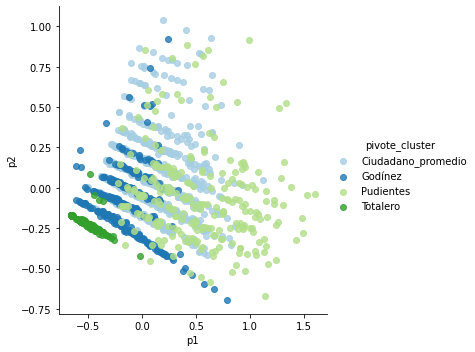

In [57]:
#PCA de 2 componentes para graficar
pca_aux = PCA(2)
pipe_aux = Pipeline(steps=[('MinMax', mm_pivote),
                           ('PCA', pca_aux)])

#Aplicar MinMax y PCA al mismo tiempo
Xg = pd.DataFrame(pipe_aux.fit_transform(pivote.iloc[:,:-1]), 
                  index = pivote.index, 
                  columns = ['p1','p2'])

Xg['pivote_cluster'] = Xs['pivote_cluster'].copy()

#Scatterplot de las dos dimensiones de PCA separando por color cada clúster
sns.lmplot(data = Xg.sample(frac = .01).sort_values(by = 'pivote_cluster'),
           x = 'p1',
           y = 'p2',
           fit_reg = False, 
           hue = 'pivote_cluster', 
           palette = 'Paired')

<AxesSubplot:xlabel='pivote_cluster'>

<Figure size 432x288 with 0 Axes>

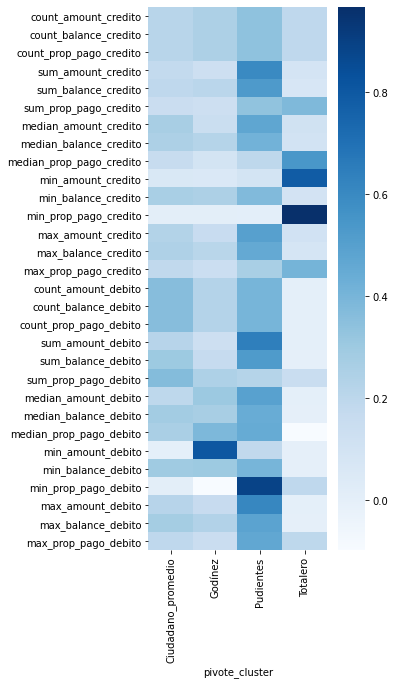

In [58]:
import seaborn as sns
#Perfilamiento
aux = pivote.groupby('pivote_cluster').mean()
#Porcentaje respecto a la suma por columna
for col in aux.columns:
    aux[col] = aux[col]/aux[col].sum()

fig = plt.figure()
fig, ax = plt.subplots(figsize=(4,10)) 
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

#Heatmap
sns.heatmap(aux.transpose(), cmap = 'Blues')

### Cluster

#### Preprocesamiento

In [59]:
cluster = pivote.reset_index().pivot_table(index = 'account_id', 
                                           columns = 'pivote_cluster', 
                                           values = 'max_prop_pago_debito',
                                           aggfunc = 'count', 
                                           fill_value = 0)
cluster['tot'] = cluster.sum(axis = 1)
for col in cluster.columns:
    cluster[col] /= cluster['tot']
    
cluster.drop(columns = ['tot'], inplace = True)
cluster.sample(4)

pivote_cluster,Ciudadano_promedio,Godínez,Pudientes,Totalero
account_id,,,,
3644,0.93,0.01,0.00,0.06
4255,0.79,0.05,0.15,0.02
1388,0.88,0.04,0.05,0.04
3230,0.20,0.28,0.43,0.09


In [60]:
df = df.merge(cluster.reset_index(), 
              on = 'account_id',
              how = 'left').set_index('account_id')
df.sample(4)

,client_age,district_cluster,genero,type,account_age,account_month,loan_id,amount,duration,payments,status,loan_age,loan_month,card_type,card_age,card_month,Ciudadano_promedio,Godínez,Pudientes,Totalero
account_id,,,,,,,,,,,,,,,,,,,,
3728,36,Central City (delitos),HM,2,6,8,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,0.77,0.19,0.00,0.04
745,65,Smallville,M,1,3,10,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,0.67,0.07,0.00,0.27
1288,73,Central City (delitos),M,1,7,11,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,0.90,0.03,0.00,0.06
8934,31,Central City (delitos),M,1,7,6,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,No_aplica,0.00,0.52,0.45,0.03


In [61]:
df['tgt'] = df.iloc[:,-4:].idxmax(axis = 1)
df['tgt'].value_counts(1)

Ciudadano_promedio   0.75
Pudientes            0.13
Godínez              0.11
Totalero             0.02
Name: tgt, dtype: float64

df = df[(df['status'] != 'No_aplica')|(df['card_type'] != 'No_aplica')].copy()

In [62]:
num = [x for x in df.describe().columns]
cat = [x for x in df.columns if x not in num + ['tgt']]
df = df[cat+num+['tgt']].copy()

#Encoder para categóricas
from category_encoders.cat_boost import CatBoostEncoder
encod = CatBoostEncoder()

#Escala para numéricas
from sklearn.preprocessing import MinMaxScaler
mm_x = MinMaxScaler()

#Se aplicará transformación para cada tipo de columnas
from sklearn.compose import ColumnTransformer
prep = ColumnTransformer(transformers=[('Cat_encod', encod, cat),
                                       ('Scale', mm_x, num)])

Xs = pd.DataFrame(prep.fit_transform(df.iloc[:,:-1],
                                     df[['tgt']].replace({y:x for x,y 
                                                          in dict_cluster_pivote.items()})), 
                  index = df.index,
                  columns = cat+num)

Xs.sample()

,district_cluster,genero,account_age,account_month,loan_id,amount,duration,payments,status,loan_age,loan_month,card_type,card_age,card_month,client_age,type,Ciudadano_promedio,Godínez,Pudientes,Totalero
account_id,,,,,,,,,,,,,,,,,,,,
2826,1.25,1.18,1.30,1.25,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,1.24,0.06,1.00,0.81,0.17,0.00,0.08


#### Número óptimo 

In [63]:
order.sample()

,account_id,bank_to,account_to,amount,k_symbol
order_id,,,,,
34348,3343,QR,27868533,7661.00,NaN


In [64]:
order['k_symbol'].value_counts(1, dropna = False)

domestico       0.54
NaN             0.21
prestamo        0.11
seguro          0.08
arrendamiento   0.05
Name: k_symbol, dtype: float64

In [65]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples

sse,db,slc = {}, {}, {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=10).fit(Xs)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_
    db[k] = davies_bouldin_score(Xs,clusters)
    slc[k] = silhouette_score(Xs,clusters)

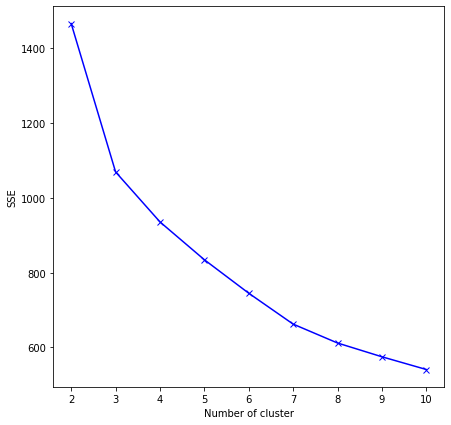

In [66]:
#Inertia, el menor
plt.figure(figsize=(7,7))
plt.plot(list(sse.keys()), list(sse.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

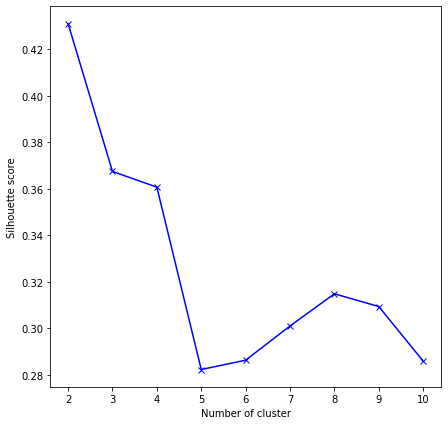

In [67]:
#Silueta, el mayor
plt.figure(figsize=(7,7))
plt.plot(list(slc.keys()), list(slc.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

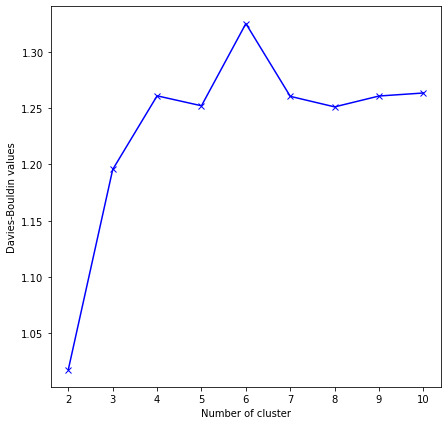

In [68]:
#DB, el menor
plt.figure(figsize=(7,7))
plt.plot(list(db.keys()), list(db.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

#### Transform

In [70]:
import string
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

mm_Xs = MinMaxScaler()

#Aplicar MinMax y PCA al mismo tiempo
Xs = pd.DataFrame(mm_Xs.fit_transform(Xs), 
                  index = Xs.index, 
                  columns = Xs.columns)

#Clusterizar
n_clusters = 8
cluster = GaussianMixture(n_components = n_clusters, random_state = 22)
df['Xs_cluster'] = Xs['Xs_cluster'] = cluster.fit_predict(Xs)

#Diccionario de letras mayúsculas
dict_cluster_Xs = dict(zip(range(n_clusters), string.ascii_uppercase[:n_clusters]))

#Reemplazar número de clúster por letra
Xs['Xs_cluster'] = Xs[['Xs_cluster']].replace(dict_cluster_Xs)
df['Xs_cluster'] = Xs['Xs_cluster'].copy()

#Porcentaje de distritos por clúster
Xs['Xs_cluster'].value_counts(1)

F   0.50
D   0.16
C   0.13
G   0.07
H   0.07
B   0.03
E   0.02
A   0.02
Name: Xs_cluster, dtype: float64

#### Perfilameinto

<AxesSubplot:xlabel='Xs_cluster'>

<Figure size 432x288 with 0 Axes>

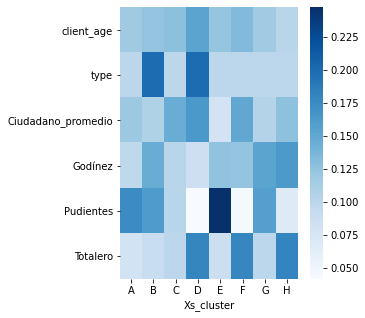

In [71]:
import seaborn as sns
#Perfilamiento
aux = df.groupby('Xs_cluster').mean()
#Porcentaje respecto a la suma por columna
for col in aux.columns:
    aux[col] = aux[col]/aux[col].sum()

fig = plt.figure()
fig, ax = plt.subplots(figsize=(4,5)) 
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

#Heatmap
sns.heatmap(aux.transpose(), cmap = 'Blues')

<AxesSubplot:xlabel='district_cluster', ylabel='Xs_cluster'>

<AxesSubplot:xlabel='genero', ylabel='Xs_cluster'>

<AxesSubplot:xlabel='account_age', ylabel='Xs_cluster'>

<AxesSubplot:xlabel='duration', ylabel='Xs_cluster'>

<AxesSubplot:xlabel='status', ylabel='Xs_cluster'>

<AxesSubplot:xlabel='card_type', ylabel='Xs_cluster'>

<AxesSubplot:xlabel='card_age', ylabel='Xs_cluster'>

<Figure size 432x288 with 0 Axes>

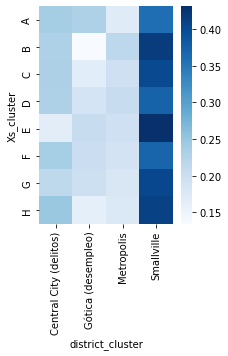

<Figure size 432x288 with 0 Axes>

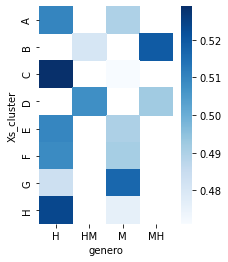

<Figure size 432x288 with 0 Axes>

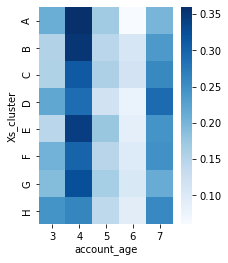

<Figure size 432x288 with 0 Axes>

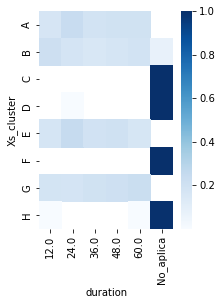

<Figure size 432x288 with 0 Axes>

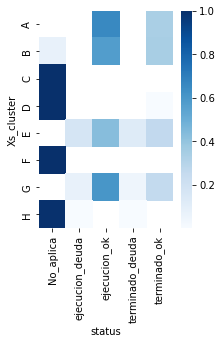

<Figure size 432x288 with 0 Axes>

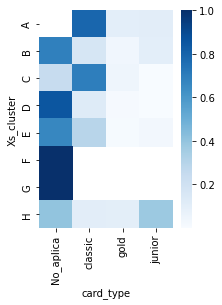

<Figure size 432x288 with 0 Axes>

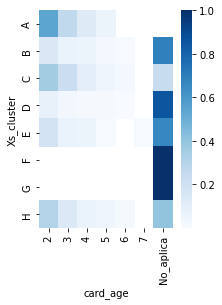

In [72]:
for var in ['district_cluster',
            'genero',
            'account_age',
            'duration',
            'status',
            'card_type',
            'card_age']:
    aux = df.pivot_table(index = var,
                         columns = 'Xs_cluster',
                         values = 'type', 
                         aggfunc = 'count')
    for col in aux.columns:
        aux[col] /= aux[col].sum()
        
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(3,4)) 
    fig.patch.set_facecolor('white')
    fig.patch.set_alpha(0.9)

    #Heatmap
    display(sns.heatmap(aux.transpose(), cmap = 'Blues'))

Diagrama:


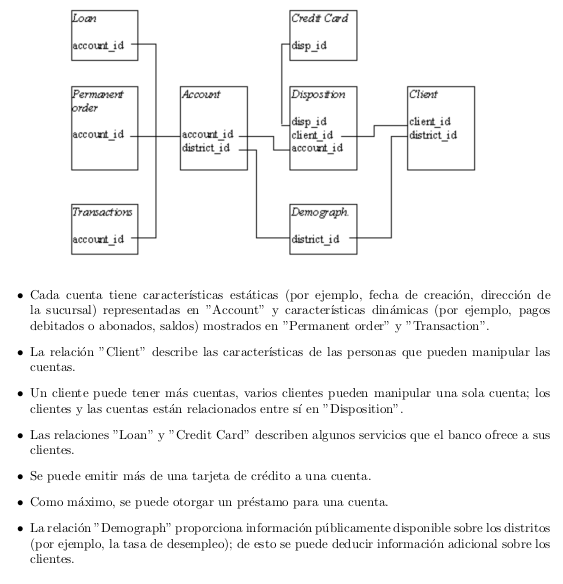

Dicc_01:


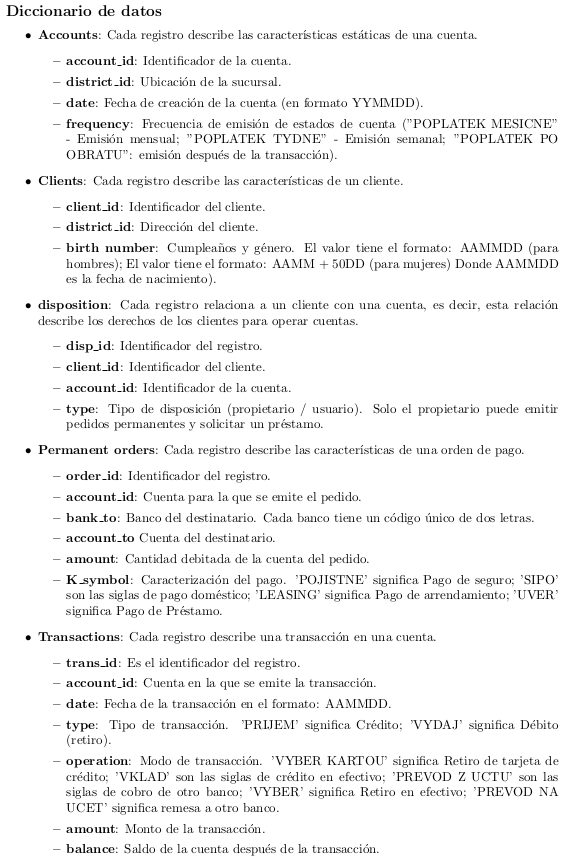

Dicc_02:


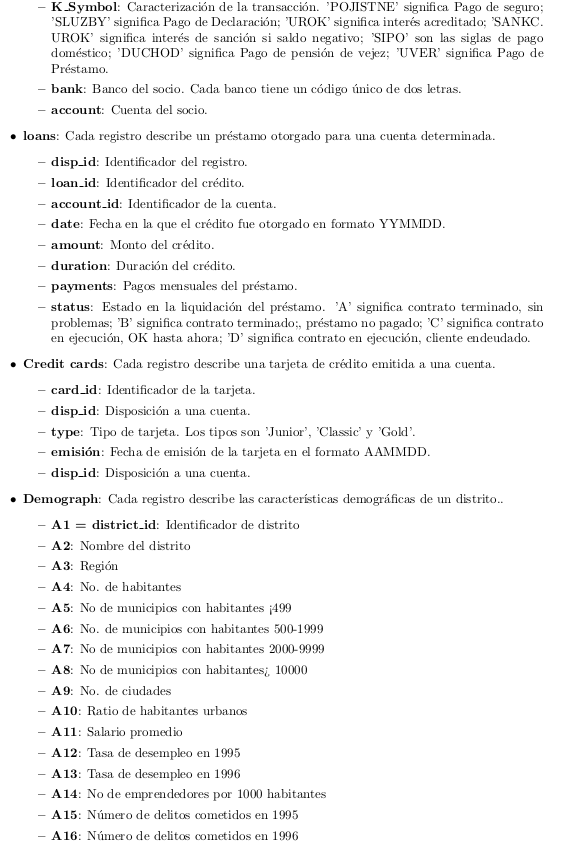

Entregables:


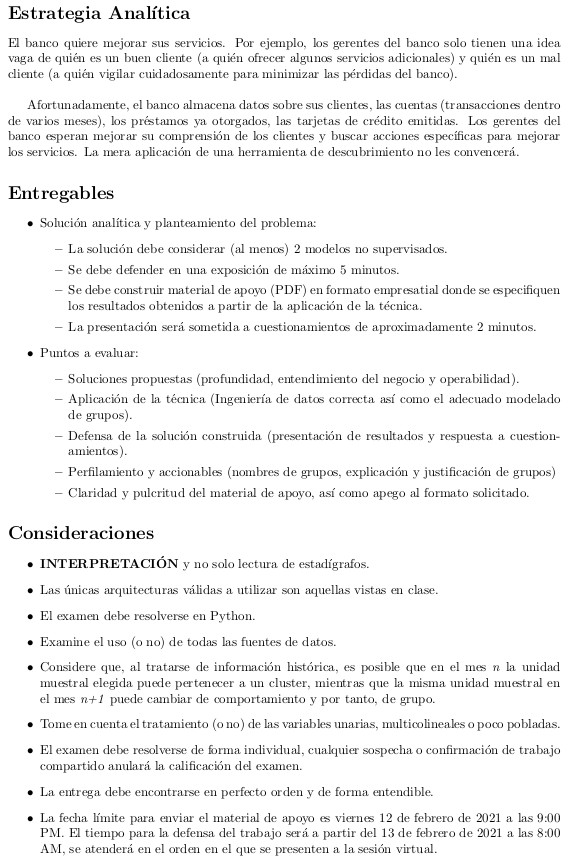

In [73]:
from PIL import Image

image_dir = liga[:-14] + 'images/'
images = os.listdir(image_dir)

for image in sorted(images):
    print(f'{image[:-4][6:].capitalize()}:')
    display(Image.open(image_dir + image))

## Fin

In [74]:
#Tiempo total para correr el notebook
end = time.time()
time_exp(end - start)
tono()

2 minutos con 30.58 segundos
